In [143]:
import pandas as pd
import numpy as np

# Replace 'your_file.csv' with the path to your CSV file
kagel_df = pd.read_csv('Sam_data\\Breast_Cancer.csv')
SEER_df = pd.read_csv('Sam_data\\SEER Breast Cancer Dataset .csv')


In [144]:
column_names = ['Class', 'Age', 'menopause','Tumor Size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']

ieee_df = pd.read_csv('Sam_data\\breast-cancer.data', names=column_names, header=None)

In [145]:
ieee_df.head()

,Class,Age,menopause,Tumor Size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [146]:
kagel_df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [147]:
SEER_df = SEER_df.drop(['Unnamed: 3'],axis=1)
SEER_df.insert(loc=4, column='differentiate', value=np.nan)
SEER_df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'differentiate', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [148]:
merged_df = pd.concat([SEER_df, kagel_df], ignore_index=True)

In [149]:
merged_df.head(-20)

,Age,Race,Marital Status,T Stage,differentiate,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,NaN,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,NaN,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,53,White,Married,T2,Moderately differentiated,N2,IIIA,2,Regional,30,Positive,Positive,12,5,85,Alive
8024,31,White,Divorced,T2,Poorly differentiated,N1,IIB,3,Regional,45,Positive,Positive,13,2,63,Alive
8025,55,White,Married,T2,Moderately differentiated,N1,IIB,2,Regional,45,Positive,Positive,16,1,24,Alive
8026,57,White,Divorced,T1,Well differentiated,N1,IIA,1,Regional,15,Positive,Positive,5,1,61,Alive


In [150]:
"""

bins = [10, 20, 30, 40, 50,60,70,80,90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Replace 'Score' values with the range they fall into
merged_df['Age'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, include_lowest=True)

bins = list(range(0, 61, 5))  # [0, 5, 10, ..., 60]
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # ['0-4', '5-9', ..., '55-59']

# Apply binning (right=False makes upper bound exclusive)
merged_df['Tumor Size'] = pd.cut(merged_df['Tumor Size'], bins=bins, labels=labels, include_lowest=True)

"""

'\n\nbins = [10, 20, 30, 40, 50,60,70,80,90]\nlabels = [\'10-19\', \'20-29\', \'30-39\', \'40-49\', \'50-59\', \'60-69\', \'70-79\', \'80-89\']\n\n# Replace \'Score\' values with the range they fall into\nmerged_df[\'Age\'] = pd.cut(merged_df[\'Age\'], bins=bins, labels=labels, include_lowest=True)\n\nbins = list(range(0, 61, 5))  # [0, 5, 10, ..., 60]\nlabels = [f"{i}-{i+4}" for i in bins[:-1]]  # [\'0-4\', \'5-9\', ..., \'55-59\']\n\n# Apply binning (right=False makes upper bound exclusive)\nmerged_df[\'Tumor Size\'] = pd.cut(merged_df[\'Tumor Size\'], bins=bins, labels=labels, include_lowest=True)\n\n'

In [151]:
merged_df.head(-20)

,Age,Race,Marital Status,T Stage,differentiate,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,NaN,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,NaN,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,53,White,Married,T2,Moderately differentiated,N2,IIIA,2,Regional,30,Positive,Positive,12,5,85,Alive
8024,31,White,Divorced,T2,Poorly differentiated,N1,IIB,3,Regional,45,Positive,Positive,13,2,63,Alive
8025,55,White,Married,T2,Moderately differentiated,N1,IIB,2,Regional,45,Positive,Positive,16,1,24,Alive
8026,57,White,Divorced,T1,Well differentiated,N1,IIA,1,Regional,15,Positive,Positive,5,1,61,Alive


In [152]:
ieee_df['Status'] = "Alive"

ieee_df['Age'] = ieee_df['Age'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

ieee_df['Tumor Size'] = ieee_df['Tumor Size'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

merged_df = pd.concat([merged_df, ieee_df], ignore_index=True)

In [153]:
merged_df.head(-20)


,Age,Race,Marital Status,T Stage,differentiate,N Stage,6th Stage,Grade,A Stage,Tumor Size,...,Survival Months,Status,Class,menopause,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,43.0,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N3,IIIC,Moderately differentiated; Grade II,Regional,40.0,...,1.0,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47.0,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,45.0,...,2.0,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67.0,White,Married (including common law),T2,NaN,N1,IIB,Poorly differentiated; Grade III,Regional,25.0,...,2.0,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46.0,White,Divorced,T1,NaN,N1,IIA,Moderately differentiated; Grade II,Regional,19.0,...,2.0,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63.0,White,Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,35.0,...,3.0,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8309,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,...,NaN,Alive,recurrence-events,ge40,12-14,yes,3.0,left,right_low,yes
8310,64.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,...,NaN,Alive,recurrence-events,ge40,0-2,no,3.0,left,left_up,no
8311,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,...,NaN,Alive,recurrence-events,lt40,0-2,?,1.0,left,left_up,no
8312,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,...,NaN,Alive,recurrence-events,lt40,0-2,?,1.0,left,left_low,no


In [154]:
merged_df['Alive'] = (merged_df['Status'] == 'Alive').astype(int)
merged_df.head(-20)

,Age,Race,Marital Status,T Stage,differentiate,N Stage,6th Stage,Grade,A Stage,Tumor Size,...,Status,Class,menopause,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Alive
0,43.0,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N3,IIIC,Moderately differentiated; Grade II,Regional,40.0,...,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,47.0,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,45.0,...,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,67.0,White,Married (including common law),T2,NaN,N1,IIB,Poorly differentiated; Grade III,Regional,25.0,...,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,46.0,White,Divorced,T1,NaN,N1,IIA,Moderately differentiated; Grade II,Regional,19.0,...,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,63.0,White,Married (including common law),T2,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,35.0,...,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8309,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,...,Alive,recurrence-events,ge40,12-14,yes,3.0,left,right_low,yes,1
8310,64.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,...,Alive,recurrence-events,ge40,0-2,no,3.0,left,left_up,no,1
8311,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,...,Alive,recurrence-events,lt40,0-2,?,1.0,left,left_up,no,1
8312,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,...,Alive,recurrence-events,lt40,0-2,?,1.0,left,left_low,no,1


In [155]:
merged_df['Race'] = merged_df['Race'].str.split().str[0]

Race
Black    0.749141
Other    0.896875
White    0.850571
Name: Alive, dtype: float64


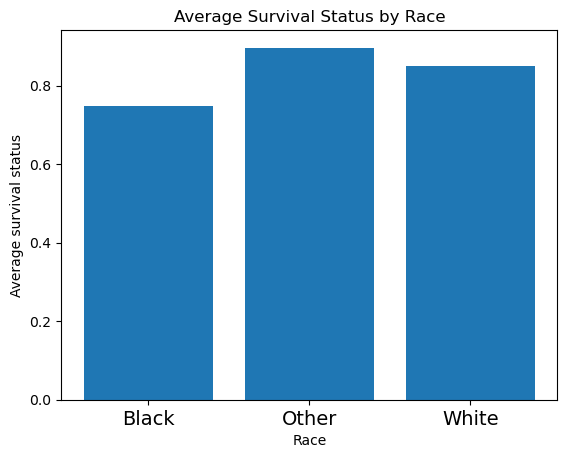

<Figure size 1400x1000 with 0 Axes>

In [156]:
import matplotlib.pyplot as plt

avg_alive_by_race = merged_df.groupby('Race')['Alive'].mean()

print(avg_alive_by_race)

# Create bar chart
plt.bar(avg_alive_by_race.index, avg_alive_by_race.values)

plt.xticks(fontsize=14)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Average survival status')
plt.title('Average Survival Status by Race')

plt.figure(figsize=(14, 10))

# Show plot
plt.show()

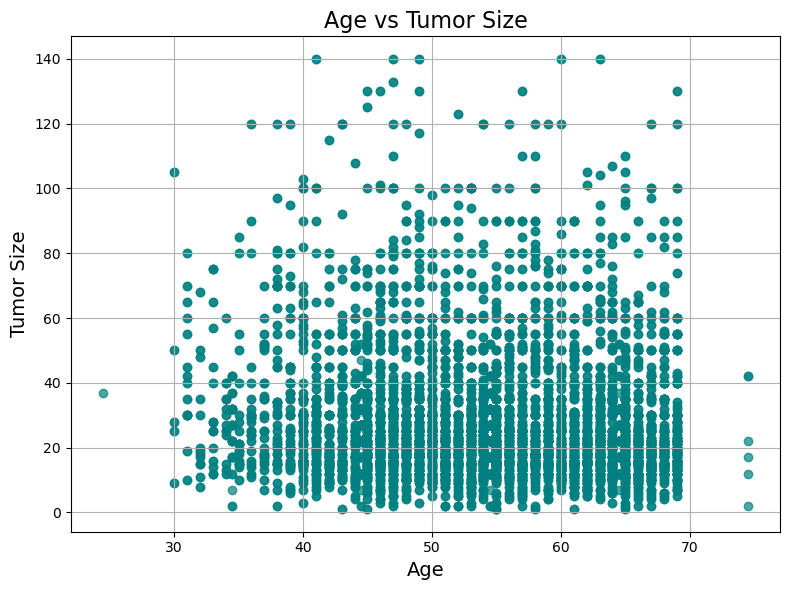

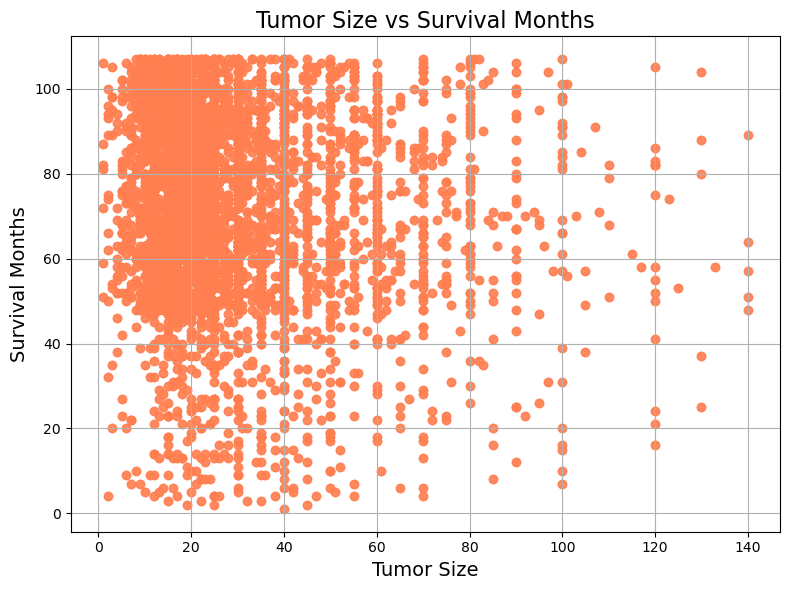

In [157]:
import matplotlib.pyplot as plt

df = merged_df

# 1. Age vs Tumor Size
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Tumor Size'], alpha=0.7, color='teal')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Tumor Size', fontsize=14)
plt.title('Age vs Tumor Size', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Tumor Size vs Survival Months
plt.figure(figsize=(8, 6))
plt.scatter(df['Tumor Size'], df['Survival Months'], alpha=0.7, color='coral')
plt.xlabel('Tumor Size', fontsize=14)
plt.ylabel('Survival Months', fontsize=14)
plt.title('Tumor Size vs Survival Months', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


In [165]:
df["Grade"].unique()

array(['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV', '3', '2', '1',
       ' anaplastic; Grade IV', nan], dtype=object)

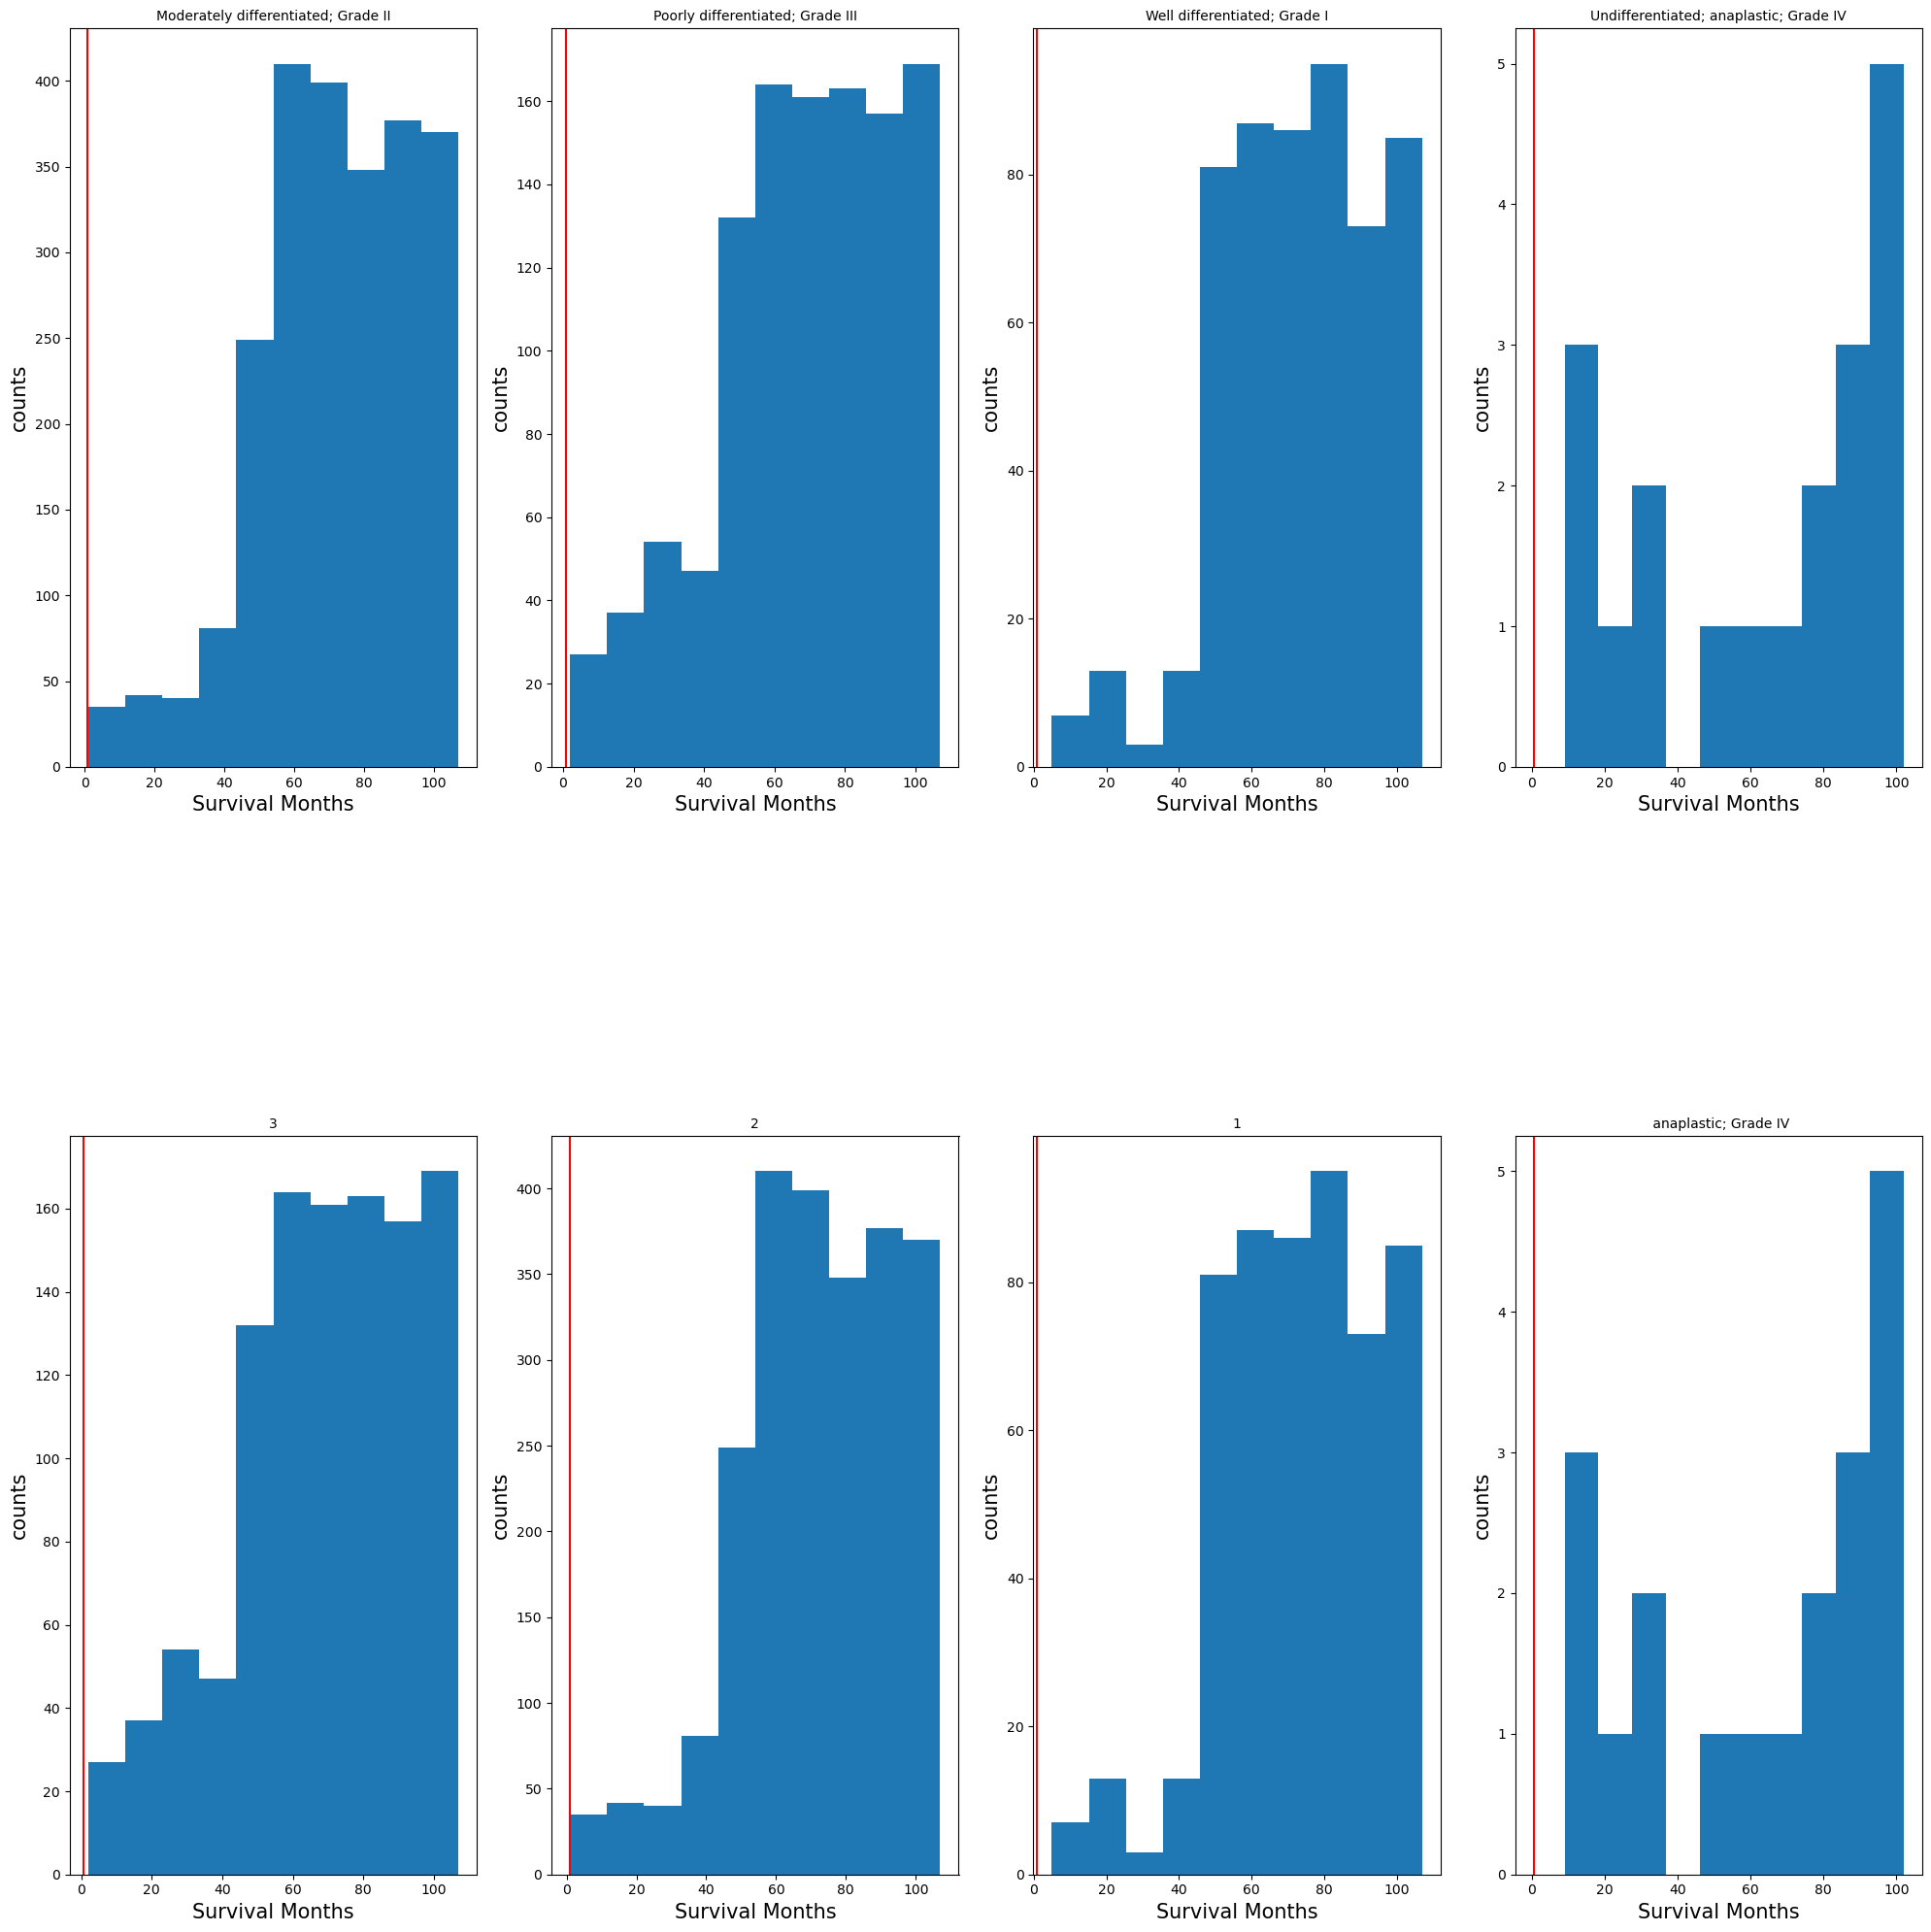

In [179]:
my_models = ['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV', '3', '2', '1',
       ' anaplastic; Grade IV']

fig, ax = plt.subplots (2, 4, figsize = (20,20)) # 20 subplots
for i in range(len(my_models)):
    row = i//4
    column = i%4
    Grade = df['Grade'] == my_models[i]
    ax[row, column].hist(data = df[Grade], x = 'Survival Months')
    ax[row, column].set_title(my_models[i], fontsize = 10)
    ax[row, column].set_xlabel('Survival Months', fontsize = 15)
    ax[row, column].set_ylabel("counts", fontsize = 15)
    
    avg_value = df[Grade]['Alive'].mean()
    if avg_value > 6.9:
        ax[row, column].axvline(avg_value, color='black')
    else:
        ax[row, column].axvline(avg_value, color='red')


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

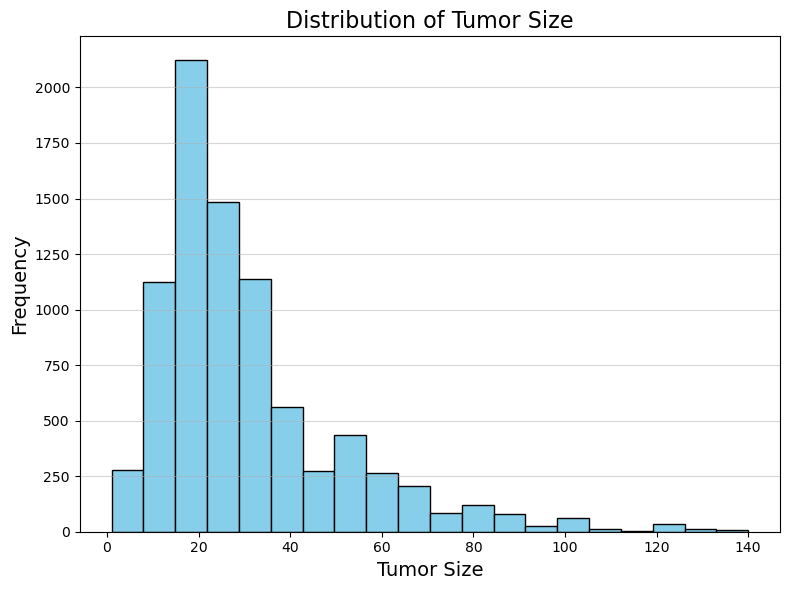

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Tumor Size'].dropna(), bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Tumor Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Tumor Size', fontsize=16)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


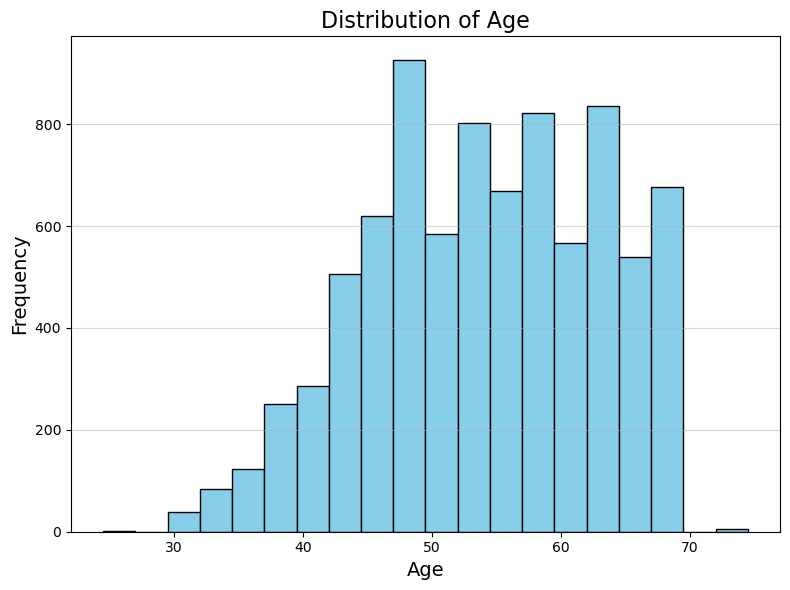

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Age', fontsize=16)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
